In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("/home/santosh/Downloads/archive(4)/HCLTECH.csv")
data.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [7]:
time_data = data.dropna()

time_data.index = pd.to_datetime(time_data.Date)

time_data = time_data["Prev Close"]["2013-01-01" : "2013-12-02"]

time_data.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

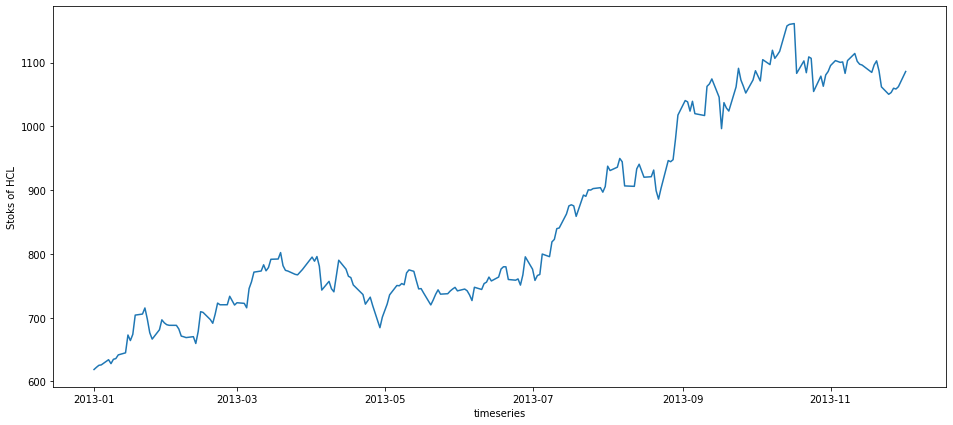

In [8]:
plt.figure(figsize=(16,7))

fig = plt.figure(1)

ax1 = fig.add_subplot(111)

ax1.set_xlabel("timeseries")

ax1.set_ylabel("Stoks of HCL")

ax1.plot(time_data)

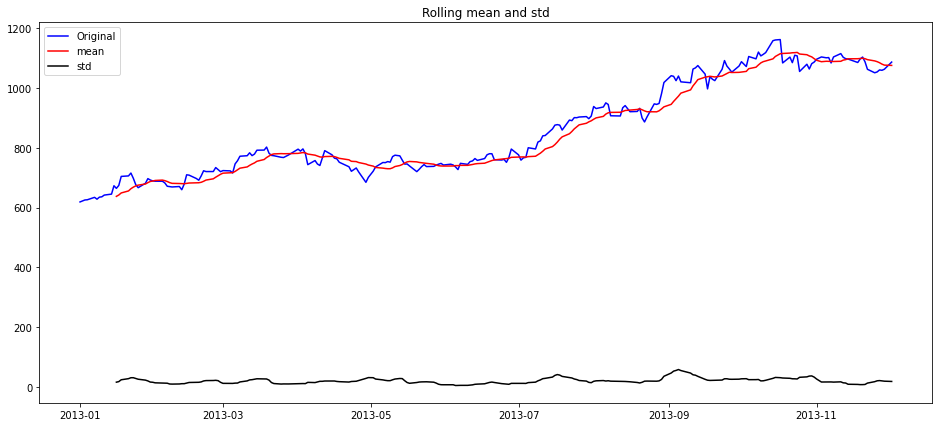

In [9]:
rollman = time_data.rolling(12). mean()
rollstd = time_data.rolling(12).std()


plt.figure(figsize=(16,7))

fig = plt.figure(1)


origi = plt.plot(time_data, color = "blue", label = "Original")
mean = plt.plot(rollman, color = "red", label = "mean")
std = plt.plot(rollstd, color = "black", label = "std")
plt.legend(loc = "best")
plt.title("Rolling mean and std")
plt.show()


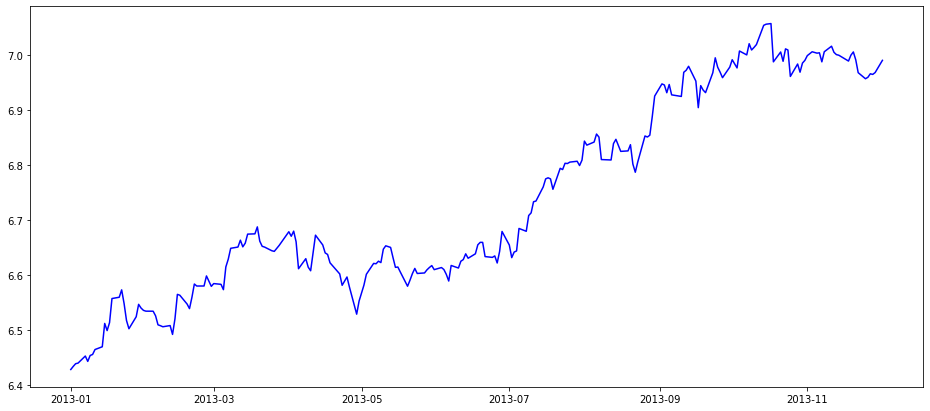

In [10]:
#making series stationary
plt.figure(figsize=(16,7))

fig = plt.figure(1)

log = np.log(time_data)
plt.plot(log, color = 'blue')

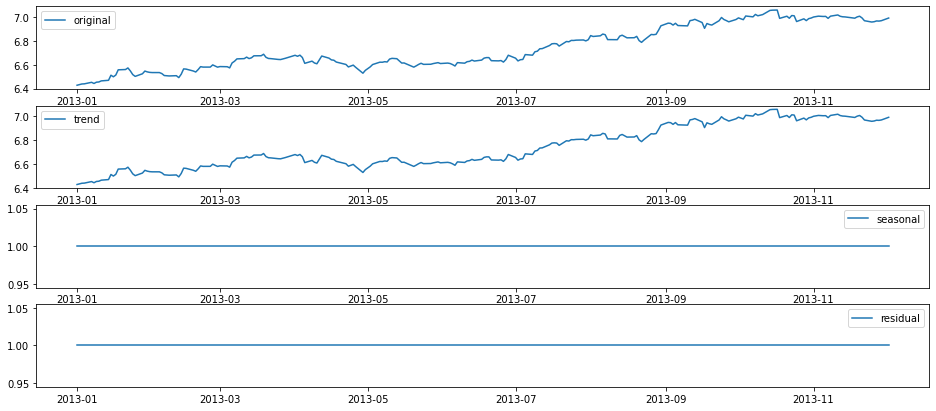

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompostion = seasonal_decompose(log, freq = 1, model = "multiplicative")

trend = decompostion.trend

seasonal = decompostion.seasonal

residual = decompostion.resid

plt.figure(figsize=(16,7))

fig = plt.figure(1)

plt.subplot(411)
plt.plot(log, label = "original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = "trend")
plt.legend(loc = "best")

plt.subplot(413)
plt.plot(seasonal, label = "seasonal")
plt.legend(loc = "best")

plt.subplot(414)
plt.plot(residual, label = "residual")
plt.legend(loc = "best")




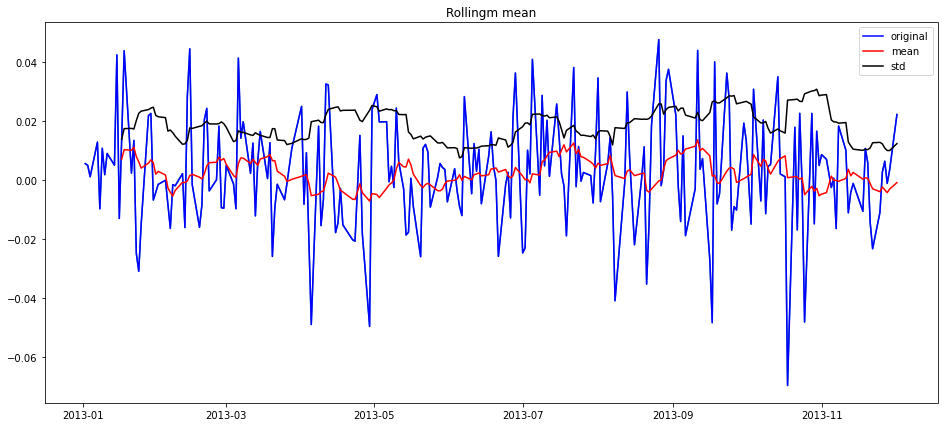

In [13]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

ts_log = log - log.shift()
plt.plot(ts_log)


rollmean = ts_log.rolling(12).mean()
rollstd = ts_log.rolling(12).std()

org = plt.plot(ts_log, color = "blue", label = "original")
mean = plt.plot(rollmean, color = "red", label = "mean")
std = plt.plot(rollstd, color = "black", label = "std")
plt.legend(loc = "best")
plt.title("Rollingm mean")
plt.show()
